In [91]:
import numpy as np
import pandas as pd
import spacy
import json 
import nltk
import os
import spacy
import seaborn
from spacy.lang.en import English
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy.displacy as displacy
from keras.preprocessing import text 
from keras.preprocessing.sequence import skipgrams
from keras.layers import Concatenate
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import Dot
from keras.preprocessing import text
from keras.preprocessing import sequence
import ast 
import gensim.downloader as api
from sklearn.manifold import TSNE
import operator
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
from keras.utils import np_utils 
import matplotlib.pyplot as plt
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
# to cancatinate two files into one
trainingdata = pd.read_csv('/content/drive/MyDrive/text_mining_project/naturalscience/train.csv')
testdata = pd.read_csv('/content/drive/MyDrive/text_mining_project/naturalscience/test.csv')

frames = [trainingdata, testdata]
# to merge two dataframes into one 
sciecedf = pd.concat(frames) 

([<matplotlib.patches.Wedge at 0x7f9ed1cf6950>,
 [Text(0.3383829574144258, 1.1513022948519938, 'Posts about Biology'),
  Text(-1.1661621050493447, -0.2829592634053195, 'Posts about Physics'),
  Text(0.6003175260328365, -1.0390470961115357, 'Posts about Chemistry')],
 [Text(0.19739005849174837, 0.6715930053303296, '41%'),
  Text(-0.6802612279454511, -0.16505957031976973, '26%'),
  Text(0.3501852235191546, -0.6061108060650624, '33%')])

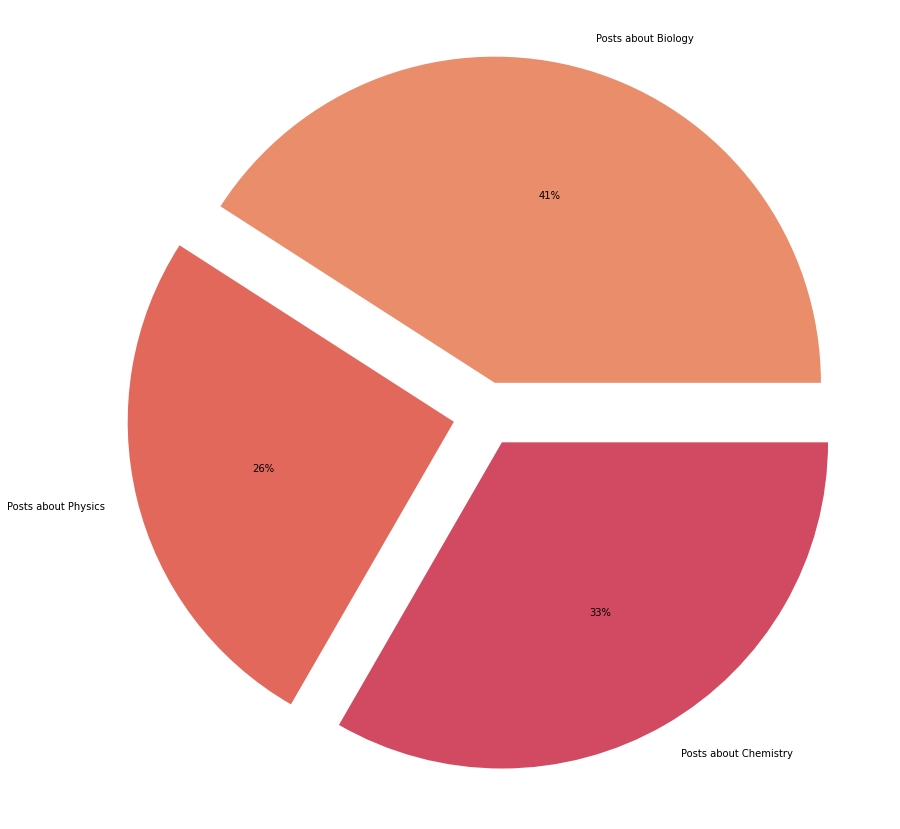

In [20]:
# to create a dataframe which contains only blog posts pertaining discussions about biology
Biology_df = sciecedf[sciecedf['Topic'] == 'Biology'] 
# to create a dataframe which contains only blog posts pertaining discussions about physics
Physics_df = sciecedf[sciecedf['Topic'] == 'Physics'] 
# to create a dataframe which contains only blog posts pertaining discussions about chemistry
Chemistry_df = sciecedf[sciecedf['Topic'] == 'Chemistry'] 

# to create a pie diagram 
data = [len(Biology_df), len(Physics_df), len(Chemistry_df)]
labels = ['Posts about Biology', 'Posts about Physics', 'Posts about Chemistry'] 

# declaring exploding pie
explode = [0.1, 0.1, 0.1] 

# Seaborn colour palette  
palette_color = seaborn.color_palette("flare")  
plt.figure(figsize=(15, 15))
plt.pie(data, labels=labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')

In [102]:
class Discouse_Histogram: 
  def __init__(self, inputdf): 
    self.df = inputdf 

  def counting_words(self): 
    '''
    input, an instance variable, self.df 

    output: 
      an updated dataframe 
      a histogram, the number of words per post
    '''
    # to create an empty list, to store the number of words 
    def countingwords(inputlist): 
      newlist = inputlist.split() 
      # counting the number of words per input list 
      Ln = len(newlist)
      return int(Ln )

    # to update the dataframe 
    self.df['nr_words'] = self.df['Comment'].apply(lambda x: countingwords(x)) 
    number_of_words = self.df['nr_words'].tolist()
    # to create a histogram  
    plt.figure(figsize=(15, 10))
    seaborn.histplot(x= number_of_words, color= "navy", bins = 40, binwidth=5)
    plt.xlabel('Number of Words')
    plt.ylabel('Counts') 
    plt.grid()
    plt.title('Histogram, the number of words')

  def counting_sentence(self): 
    '''
    input, an instance variable, self.df 
    output: 
      an updated dataframe 
      a histogram, the number of sentences per post
    '''
    def countsentence(inputlist): 
      # to divide the an entry into several elements. 
      newlist = sent_tokenize(inputlist)
      Ls = len(newlist)
      return Ls 
    self.df['nr_sentence'] = self.df['Comment'].apply(lambda x: countsentence(x))  
    plt.figure(figsize=(15, 10))
    number_of_sentences = self.df['nr_sentence'].tolist() 
    seaborn.histplot(x= number_of_sentences, color= "darkorange", bins = 20)
    plt.xlabel('Number of sentences')
    plt.ylabel('Counts') 
    plt.grid()
    plt.title('Histogram, the number of sentences')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


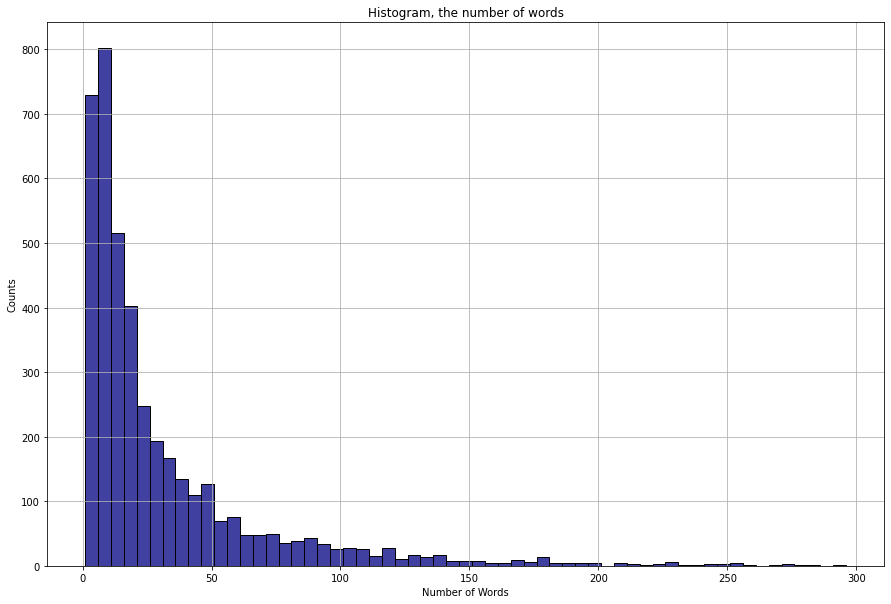

In [103]:
# to process a dataframe pertaining posts/discussions about biology 
model_biology = Discouse_Histogram(Biology_df)
model_biology.counting_words( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


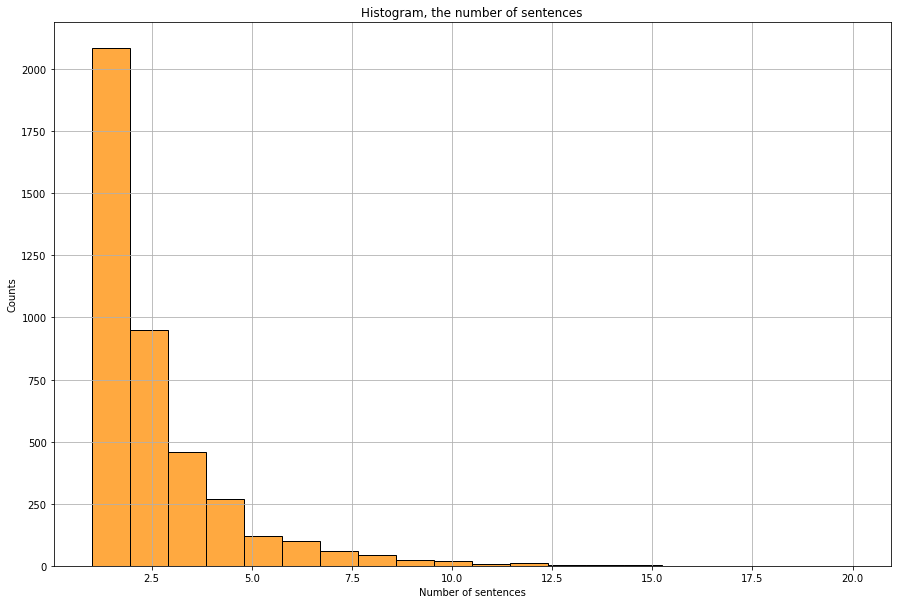

In [104]:
model_biology.counting_sentence( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


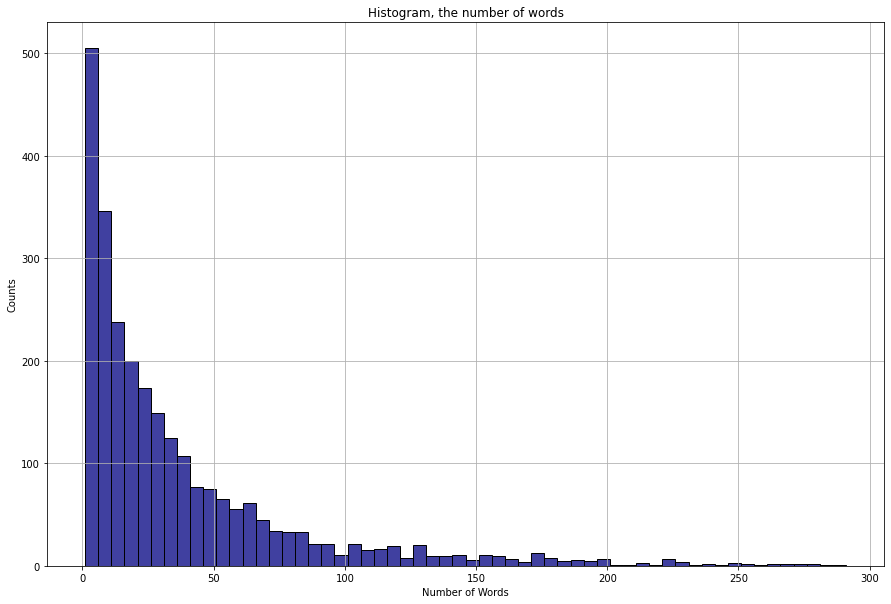

In [105]:
# to process a dataframe pertaining posts/discussions about physics
model_physics = Discouse_Histogram(Physics_df)
model_physics.counting_words( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


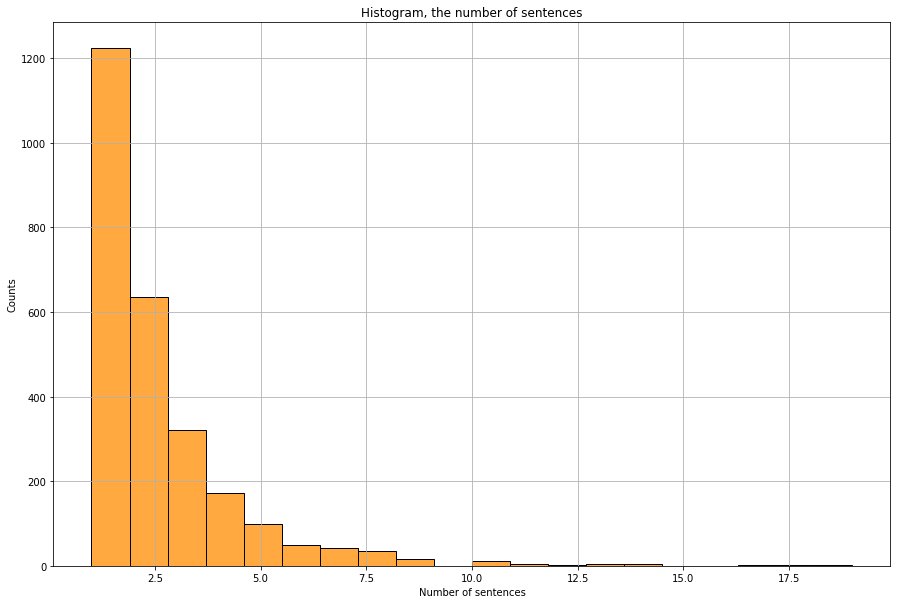

In [106]:
model_physics.counting_sentence( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


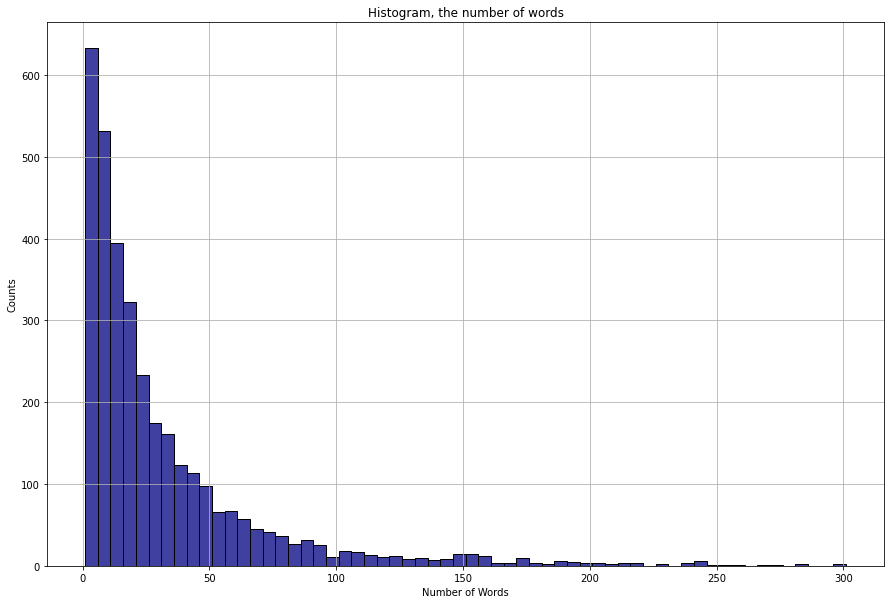

In [107]:
# to process a dataframe pertaining posts/discussions about chemistry
model_chemistry = Discouse_Histogram(Chemistry_df) 
model_chemistry.counting_words( )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


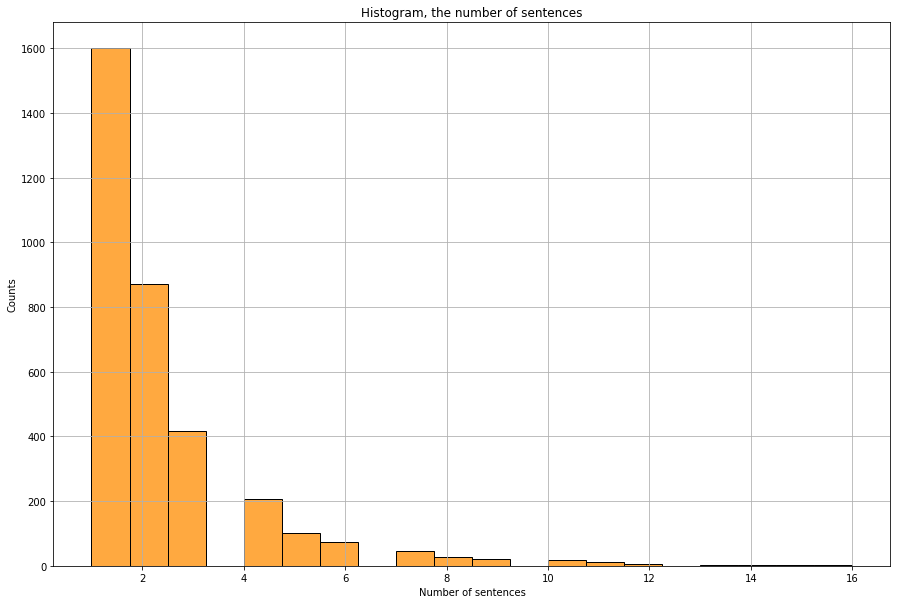

In [108]:
model_chemistry.counting_sentence( )